# Kaggle 데이터를 통한 부동산 데이터 분석 연습
### Kaggle의 House Sales in King County, USA 데이터를 이용하여 EDA 및 분석을 연습 해봤습니다.


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import scipy.stats as st
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')

In [45]:
df_usa = pd.read_csv("kc_house_data.csv")

In [46]:
df_usa.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [47]:
print(df_usa.shape)
print(df_usa.nunique()) # 데이터 각 변수의 종류 개수 확인

(21613, 21)
id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
date                 2
dtype: int64


In [48]:
print(df_usa.info()) # 데이터 타입 결측값 유무 없어보입니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
date             21613 non-null int64
dtypes: float64(5), int64(16)
memory usage: 3.5 MB
None


## 데이터 전처리
#### sqft_living, sqft_lot 변수는 15년도 변경 데이터와 상당히 유사하다.
#### yr renovated 변경사항이 있는 데이터가 있다.
#### sqft_above와 sqft_basement변수가 있다. 
#### 이중에서 sqft_above변수는 sqft_living와 상당히 유사하여 다중공선성이 나타나서 제거해준다. 
#### 거래년도가 다른 중복된 품목이 있으므로 처리해 준다.
#### yr_renovated 변수는 renovated 변수로 바꿔서 년도가 0이면 그대로 0,  0이 아니라면 1으로 처리
#### sqft_living15, sqft_lot15 변수들은 놔두고 sqft_living, sqft_lot은 제거해준다.  
#### sqft_basement는 basement변수로 범주화 시킨다 있으면 1 없으면 0

In [49]:
df_usa=df_usa.drop_duplicates(['id'],keep='last')#중복행 제거

In [50]:
df_usa.loc[df_usa['yr_renovated'] >0.0,'renovated']  = 1
df_usa.loc[df_usa['yr_renovated'] ==0.0,'renovated']  = 0

In [51]:
df_usa.loc[df_usa['sqft_basement'] >0.0,'basement']  = 1
df_usa.loc[df_usa['sqft_basement'] ==0.0,'basement']  = 0

In [52]:
df_usa=df_usa.drop(['sqft_living','sqft_lot','sqft_above','sqft_basement','yr_renovated'],axis=1)

In [53]:
df_usa.describe()# bedrooms 변수에 33  

,id,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,date,renovated,basement
count,2.143600e+04,2.143600e+04,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000
mean,4.580765e+09,5.417449e+05,3.371571,2.117349,1.496198,0.007604,0.235118,3.410384,7.661737,1971.098433,98077.862288,47.560156,-122.213697,1988.314378,12785.961280,2014.325247,0.042452,0.392844
std,2.876590e+09,3.675513e+05,0.929205,0.769913,0.540388,0.086871,0.767092,0.650235,1.174256,29.385277,53.469371,0.138601,0.140896,685.699093,27375.467469,0.468478,0.201623,0.488394
min,1.000102e+06,7.500000e+04,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,0.000000,0.000000
25%,2.123700e+09,3.248660e+05,3.000000,1.750000,1.000000,0.000000,0.000000,3.000000,7.000000,1952.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000,0.000000,0.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,98065.000000,47.572000,-122.230000,1840.000000,7620.000000,2014.000000,0.000000,0.000000
75%,7.308675e+09,6.450000e+05,4.000000,2.500000,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,98117.000000,47.678000,-122.124000,2370.000000,10087.250000,2015.000000,0.000000,1.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,1.000000,1.000000


In [54]:
date = df_usa['date'].value_counts()
print(date)

2014    14464
2015     6972
Name: date, dtype: int64


No handles with labels found to put in legend.


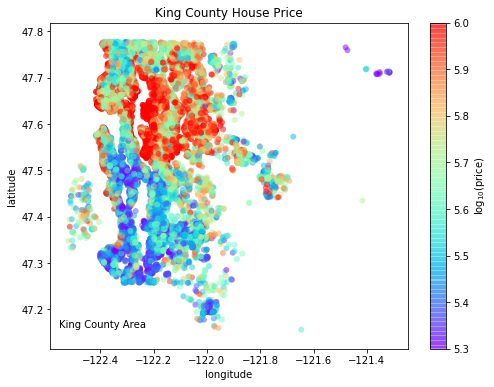

In [22]:
plt.figure(figsize = (8,6))
lat, long = df_usa['lat'], df_usa['long']
price= df_usa['price']

plt.scatter(long, lat, label=None,
            c=np.log10(price), cmap='rainbow',
            linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(price)')
plt.clim(5.3, 6)


plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='King County Area')

plt.title('King County House Price');

In [ ]:
#lat 47.5를 경계로 가격차이가 존재하는 것을 알 수 있다.

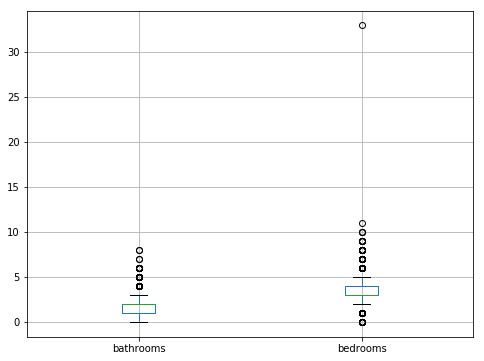

In [23]:
plt.figure(figsize = (8,6))
boxplot = df_usa.boxplot(column=['bathrooms', 'bedrooms'])#이상치 제거

In [24]:
df_usa.drop(['id', 'date','zipcode'], axis=1, inplace=True) #id, date,zipcode 변수를 없애버림

In [25]:
df_usa=df_usa.loc[df_usa['bathrooms']<4]
df_usa=df_usa.loc[df_usa['bedrooms']<=5]
df_usa=df_usa.loc[df_usa['bedrooms']>1]

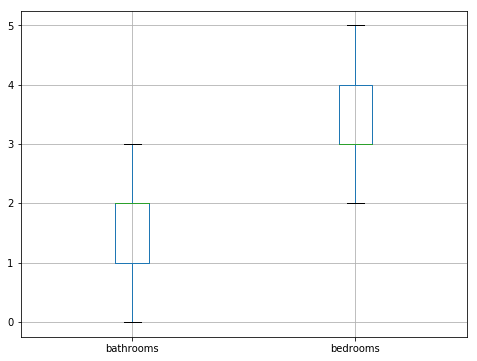

In [26]:
plt.figure(figsize = (8,6))
boxplot = df_usa.boxplot(column=['bathrooms', 'bedrooms'])

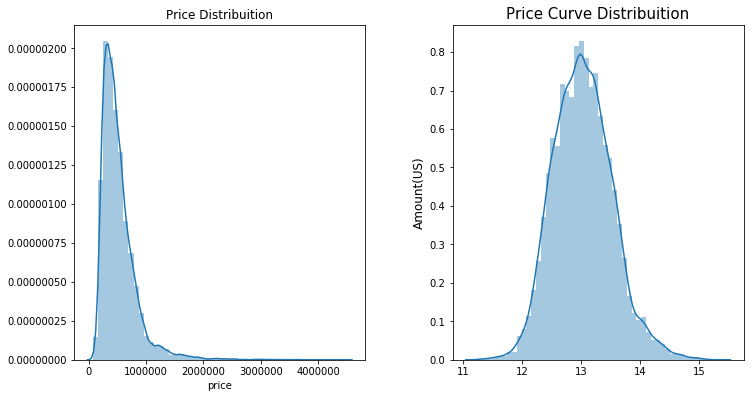

In [27]:
plt.figure(figsize = (12, 6)) #가격의 분포

plt.subplot(121)
plt.title('Price Distribuition')
sns.distplot(df_usa['price'])

plt.subplot(122)
plt.title('Price Distribuition')
sns.distplot(np.log1p(df_usa['price']))

g1= plt.title("Price Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Amount(US)", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()

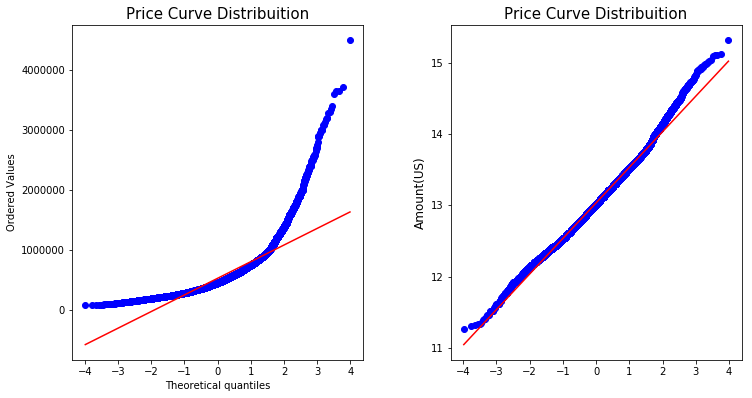

In [28]:
plt.figure(figsize = (12, 6)) #가격의 분포

plt.subplot(121)
plt.title('Price Distribuition')
g2 = stats.probplot((df_usa['price']), plot=plt)
g2= plt.title("Price Curve Distribuition", fontsize=15)

plt.subplot(122)
g1= stats.probplot(np.log1p(df_usa['price']), plot=plt)
g1= plt.title("Price Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Amount(US)", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()

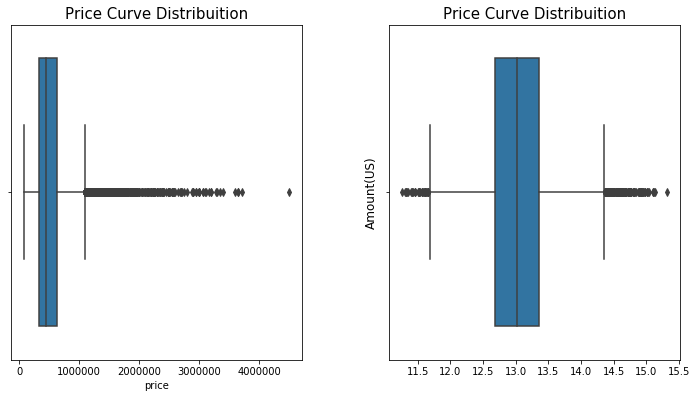

In [29]:
plt.figure(figsize = (12, 6)) #가격의 분포

plt.subplot(121)
plt.title('Price Distribuition')
g2 = sns.boxplot(df_usa['price'])
g2= plt.title("Price Curve Distribuition", fontsize=15)

plt.subplot(122)
g1= sns.boxplot(np.log1p(df_usa['price']))
g1= plt.title("Price Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Amount(US)", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()

In [30]:
df_usa.loc[:,"price"] = np.log1p(df_usa.loc[:,"price"]) #가격 데이터에 log를 씌워서 분석을 진행합니다.

In [31]:
df=df_usa

In [32]:
df = df.merge(pd.get_dummies(df.floors, prefix='Floor'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.condition, prefix='condition'), left_index=True, right_index=True)

In [33]:
del df['floors']
del df['condition']

In [34]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'waterfront', 'view', 'grade',
       'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated',
       'basement', 'Floor_1.0', 'Floor_1.5', 'Floor_2.0', 'Floor_2.5',
       'Floor_3.0', 'Floor_3.5', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5'],
      dtype='object')

In [36]:
X=df.drop('price',axis=1)
y=df[['price']]

In [37]:
X['Intercept']=1 # sm.OLS을 사용하기위해 intercept 변수 만들어 줍니다.

In [38]:
X=pd.DataFrame(X,columns=['Intercept','bedrooms', 'bathrooms', 'waterfront', 'view', 'grade',
       'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated',
       'basement', 'Floor_1.0', 'Floor_1.5', 'Floor_2.0', 'Floor_2.5',
       'Floor_3.0', 'Floor_3.5', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5'])

In [39]:
X.head()

,Intercept,bedrooms,bathrooms,waterfront,view,grade,yr_built,lat,long,sqft_living15,...,Floor_1.5,Floor_2.0,Floor_2.5,Floor_3.0,Floor_3.5,condition_1,condition_2,condition_3,condition_4,condition_5
0,1,3,1,0,0,7,1955,47.5112,-122.257,1340,...,0,0,0,0,0,0,0,1,0,0
1,1,3,2,0,0,7,1951,47.7210,-122.319,1690,...,0,1,0,0,0,0,0,1,0,0
2,1,2,1,0,0,6,1933,47.7379,-122.233,2720,...,0,0,0,0,0,0,0,1,0,0
3,1,4,3,0,0,7,1965,47.5208,-122.393,1360,...,0,0,0,0,0,0,0,0,0,1
4,1,3,2,0,0,8,1987,47.6168,-122.045,1800,...,0,0,0,0,0,0,0,1,0,0


In [40]:
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     2809.
Date:                Wed, 09 Jan 2019   Prob (F-statistic):               0.00
Time:                        08:26:24   Log-Likelihood:                -1043.6
No. Observations:               20585   AIC:                             2131.
Df Residuals:                   20563   BIC:                             2306.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -30.3903      1.532    -19.838

In [41]:
X.columns

Index(['Intercept', 'bedrooms', 'bathrooms', 'waterfront', 'view', 'grade',
       'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated',
       'basement', 'Floor_1.0', 'Floor_1.5', 'Floor_2.0', 'Floor_2.5',
       'Floor_3.0', 'Floor_3.5', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5'],
      dtype='object')

In [42]:
features = 'bedrooms+ bathrooms+ waterfront+ view+ grade+ yr_built+ lat+ long+ sqft_living15+ sqft_lot15+ renovated+ basement+ Floor_1.0+ Floor_1.5+ Floor_2.0+ Floor_2.5+ Floor_3.0+ Floor_3.5+ condition_1+ condition_2+ condition_3+ condition_4+ condition_5'

In [43]:
#독립변수들간의 상관관계를 검사하는 다중공선성 검사를 해봅니다.

In [44]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [45]:
vif.round(1)

,VIF Factor,features
0,0.000000,Intercept
1,1.400000,bedrooms
2,2.100000,bathrooms
3,1.200000,waterfront
4,1.400000,view
5,2.700000,grade
6,2.800000,yr_built
7,1.100000,lat
8,1.500000,long
9,2.500000,sqft_living15


In [46]:
#확실히 문제가 있습니다. 히트맵을 그려서 어떤 변수가 문제를 일으키는지 확인해봅니다.

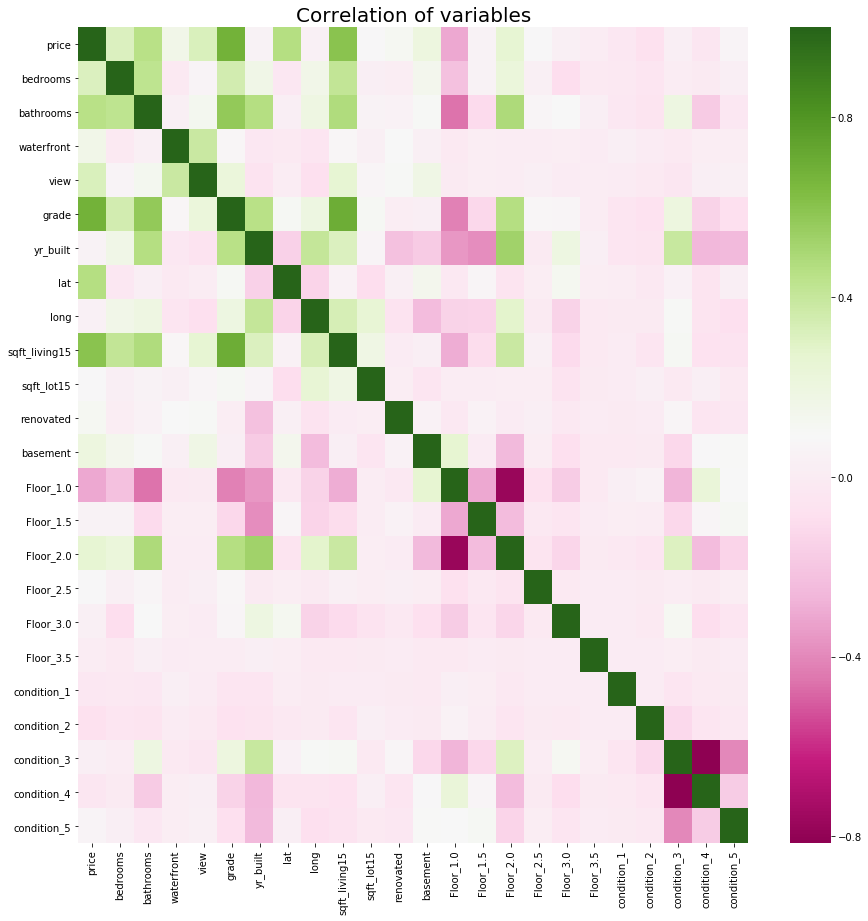

In [47]:
plt.figure(figsize=(15,15))
plt.title('Correlation of variables', fontsize=20)
sns.heatmap(df.corr().astype(float), cmap ="PiYG",vmax=1.0)
plt.show()

In [48]:
#Floor_1.0과 condition_3 변수가 문제 있어보입니다. Floor_1.0변수와 다른 독립변수들과의 상관계수를 보겠습니다.

In [49]:
correlations = df.corr()['Floor_1.0'].sort_values()

In [50]:
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 waterfront    -0.019541
Floor_3.5     -0.017008
view          -0.013213
sqft_lot15     0.004151
condition_1    0.019035
condition_2    0.047590
condition_5    0.086211
condition_4    0.231551
basement       0.268190
Floor_1.0      1.000000
Name: Floor_1.0, dtype: float64

Most Negative Correlations:
 Floor_2.0       -0.776811
bathrooms       -0.453555
grade           -0.420039
yr_built        -0.357314
Floor_1.5       -0.310675
price           -0.306822
sqft_living15   -0.289819
condition_3     -0.272401
bedrooms        -0.222960
Floor_3.0       -0.170355
Name: Floor_1.0, dtype: float64


In [51]:
#Floor_2.0 변수와 음의 상관관계가 강한것을 보입니다. 처리해줍니다.

In [52]:
# floor_1.0 변수 제거
# condition_3 변수 제거

In [53]:
X=pd.DataFrame(X,columns=['Intercept','bedrooms', 'bathrooms', 'waterfront', 'view', 'grade',
       'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated',
       'basement', 'Floor_1.5', 'Floor_2.0', 'Floor_2.5',
       'Floor_3.0', 'Floor_3.5', 'condition_1', 'condition_2', 'condition_4', 'condition_5'])

In [54]:
X.head()

,Intercept,bedrooms,bathrooms,waterfront,view,grade,yr_built,lat,long,sqft_living15,...,basement,Floor_1.5,Floor_2.0,Floor_2.5,Floor_3.0,Floor_3.5,condition_1,condition_2,condition_4,condition_5
0,1,3,1,0,0,7,1955,47.5112,-122.257,1340,...,0,0,0,0,0,0,0,0,0,0
1,1,3,2,0,0,7,1951,47.7210,-122.319,1690,...,1,0,1,0,0,0,0,0,0,0
2,1,2,1,0,0,6,1933,47.7379,-122.233,2720,...,0,0,0,0,0,0,0,0,0,0
3,1,4,3,0,0,7,1965,47.5208,-122.393,1360,...,1,0,0,0,0,0,0,0,0,1
4,1,3,2,0,0,8,1987,47.6168,-122.045,1800,...,0,0,0,0,0,0,0,0,0,0


In [55]:
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     2809.
Date:                Wed, 09 Jan 2019   Prob (F-statistic):               0.00
Time:                        08:28:22   Log-Likelihood:                -1043.6
No. Observations:               20585   AIC:                             2131.
Df Residuals:                   20563   BIC:                             2306.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -41.6370      2.093    -19.896

In [56]:
features = 'bedrooms+ bathrooms+ waterfront+ view+ grade+ yr_built+ lat+ long+ sqft_living15+ sqft_lot15+ renovated+ basement+ Floor_1.5+ Floor_2.0+ Floor_2.5+ Floor_3.0+ Floor_3.5+ condition_1+ condition_2+  condition_4+ condition_5'

In [57]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [58]:
vif.round(1)

,VIF Factor,features
0,1389792.7,Intercept
1,1.4,bedrooms
2,2.1,bathrooms
3,1.2,waterfront
4,1.4,view
5,2.7,grade
6,2.8,yr_built
7,1.1,lat
8,1.5,long
9,2.5,sqft_living15


In [59]:
X=pd.DataFrame(X,columns=['bedrooms', 'bathrooms', 'waterfront', 'view', 'grade',
       'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated',
       'basement', 'Floor_1.5', 'Floor_2.0', 'Floor_2.5',
       'Floor_3.0', 'Floor_3.5', 'condition_1', 'condition_2', 'condition_4', 'condition_5'])

In [60]:
df_usa=pd.merge(y,X,left_index=True, right_index=True) #intercept 변수를 없앤 X와 y 데이터를 df_usa에 다시 합쳐줍니다.

In [61]:
df_usa.head() # 잘됐는지 확인

,price,bedrooms,bathrooms,waterfront,view,grade,yr_built,lat,long,sqft_living15,...,basement,Floor_1.5,Floor_2.0,Floor_2.5,Floor_3.0,Floor_3.5,condition_1,condition_2,condition_4,condition_5
0,12.309987,3,1,0,0,7,1955,47.5112,-122.257,1340,...,0,0,0,0,0,0,0,0,0,0
1,13.195616,3,2,0,0,7,1951,47.7210,-122.319,1690,...,1,0,1,0,0,0,0,0,0,0
2,12.100718,2,1,0,0,6,1933,47.7379,-122.233,2720,...,0,0,0,0,0,0,0,0,0,0
3,13.311331,4,3,0,0,7,1965,47.5208,-122.393,1360,...,1,0,0,0,0,0,0,0,0,1
4,13.142168,3,2,0,0,8,1987,47.6168,-122.045,1800,...,0,0,0,0,0,0,0,0,0,0


In [62]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score 
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

In [63]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler 
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge 
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  
from xgboost import XGBRegressor, plot_importance 
from sklearn.svm import SVR, SVC, LinearSVC 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import KernelPCA, PCA 
from sklearn.feature_selection import SelectFromModel 
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV 
from sklearn.base import clone 
from sklearn.metrics import mean_squared_error as MSE

In [64]:
up=df_usa.loc[df_usa['lat']>47.5]
down=df_usa.loc[df_usa['lat']<=47.5]

In [65]:
up_price=up['price']
down_price=down['price']

In [66]:
import scipy.stats as stats

stats.f_oneway(up_price,down_price)

F_onewayResult(statistic=8048.441304525035, pvalue=0.0)

In [67]:
#up과 down의 가격 차이가 존재하는지 알아보기 위해 먼저 등분산 검정을 진행합니다.
import scipy as sp
print(sp.stats.bartlett(up_price, down_price))
print(sp.stats.fligner(up_price, down_price))
print(sp.stats.levene(up_price, down_price))

BartlettResult(statistic=377.61860400568156, pvalue=4.1061310615048224e-84)
FlignerResult(statistic=298.3080819277263, pvalue=7.698156793968841e-67)
LeveneResult(statistic=294.4485290843442, pvalue=1.525407785525752e-65)


In [68]:
#검정 결과 가격의 분산이 동일 하다는 귀무가설을 기각시키므로 up,down의 가격의 등분산은 같지 않습니다.

In [69]:
#두 집단의 평균을 비교하는 독립 표본 t검정을 진행합니다.
import numpy as np
from scipy import stats
 

tTestResult = stats.ttest_ind(up_price,down_price)
 
#perform t-test NOT assuming equal variances
tTestResultDiffVar = stats.ttest_ind(up_price, down_price, equal_var=False)
 
print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)


The t-statistic and p-value assuming equal variances is 89.713 and 0.000.
The t-statistic and p-value not assuming equal variances is 97.153 and 0.000


In [70]:
#검정 결과 up과 down의 가격은 차이가 있다고 할 수 있습니다.

In [71]:
X=up.drop('price',axis=1)
y=up[['price']]
X['Intercept']=1

In [72]:
X=pd.DataFrame(X,columns=['Intercept','bedrooms', 'bathrooms', 'waterfront', 'view', 'grade',
       'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated',
       'basement', 'Floor_1.5', 'Floor_2.0', 'Floor_2.5',
       'Floor_3.0', 'Floor_3.5', 'condition_1', 'condition_2', 'condition_4', 'condition_5'])

In [73]:
# Fit X to y
result = sm.OLS(y, X).fit()

In [74]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     1470.
Date:                Wed, 09 Jan 2019   Prob (F-statistic):               0.00
Time:                        08:28:43   Log-Likelihood:                -580.41
No. Observations:               14189   AIC:                             1205.
Df Residuals:                   14167   BIC:                             1371.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -18.0656      2.758     -6.550

## sqft_lot15 변수의 다중공선성을 확인합니다. (10보다 작은지 확인)

In [75]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [76]:
vif.round(1) #그냥 진행합니다.

,VIF Factor,features
0,1696242.9,Intercept
1,1.4,bedrooms
2,2.1,bathrooms
3,1.2,waterfront
4,1.4,view
5,2.8,grade
6,2.9,yr_built
7,1.1,lat
8,1.9,long
9,2.6,sqft_living15


In [77]:
pca = PCA(n_components=3)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [78]:
print('singular value :', pca.singular_values_)
print('singular vector :\n', pca.components_.T)
print('explained variance ratio :', pca.explained_variance_ratio_)

singular value : [2431393.02127033   80855.96032185    3545.89302166]
singular vector :
 [[-0.00000000e+00  2.76439519e-20 -3.24897210e-21]
 [ 2.71074526e-06  5.09420298e-04 -3.19576479e-04]
 [ 2.53460482e-06  4.50383972e-04 -7.53794359e-03]
 [ 7.21210160e-08  1.07776224e-05  1.00098828e-04]
 [ 8.47140029e-07  3.27086985e-04  3.64972460e-03]
 [ 7.74647211e-06  1.15959143e-03 -1.07684676e-02]
 [ 1.35917189e-04  1.30296158e-02 -9.99771937e-01]
 [ 2.11545846e-07 -6.76050658e-06 -3.31047398e-05]
 [ 2.18203776e-06  7.38415787e-05 -1.51371860e-03]
 [ 8.07384175e-03  9.99881510e-01  1.30453677e-02]
 [ 9.99967397e-01 -8.07493159e-03  3.06779078e-05]
 [ 1.80360323e-08  1.99824040e-06  1.63776264e-03]
 [-1.44781925e-06  1.43170260e-05  2.70846063e-03]
 [-3.97821546e-07 -4.76786549e-05  4.02326616e-03]
 [ 1.24795561e-06  2.59326783e-04 -6.80513931e-03]
 [-4.99996315e-08  4.61952672e-06  5.58492782e-05]
 [-7.74442970e-07 -3.38871915e-05 -1.99680259e-03]
 [-9.30951510e-09 -4.71930209e-07 -2.1454838

In [79]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('선택할 차원 수 :', d)

선택할 차원 수 : 1


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=3)

Scaled_Ridge: 0.682894 (+/- 0.015625)
Scaled_Lasso: -0.001091 (+/- 0.002155)
Scaled_Elastic: -0.001091 (+/- 0.002155)
Scaled_SVR: 0.680684 (+/- 0.015557)
Scaled_RF_reg: 0.808841 (+/- 0.011857)
Scaled_ET_reg: 0.803174 (+/- 0.015308)
Scaled_BR_reg: 0.807806 (+/- 0.012412)
Scaled_Hub-Reg: 0.681436 (+/- 0.015448)
Scaled_BayRidge: 0.682906 (+/- 0.015633)
Scaled_XGB_reg: 0.813860 (+/- 0.013910)
Scaled_DT_reg: 0.648467 (+/- 0.028599)
Scaled_KNN_reg: 0.695096 (+/- 0.015898)
Scaled_Gboost-Reg: 0.815699 (+/- 0.012378)
Scaled_RFR_PCA: -0.193830 (+/- 0.074374)
Scaled_XGBR_PCA: 0.178622 (+/- 0.019909)


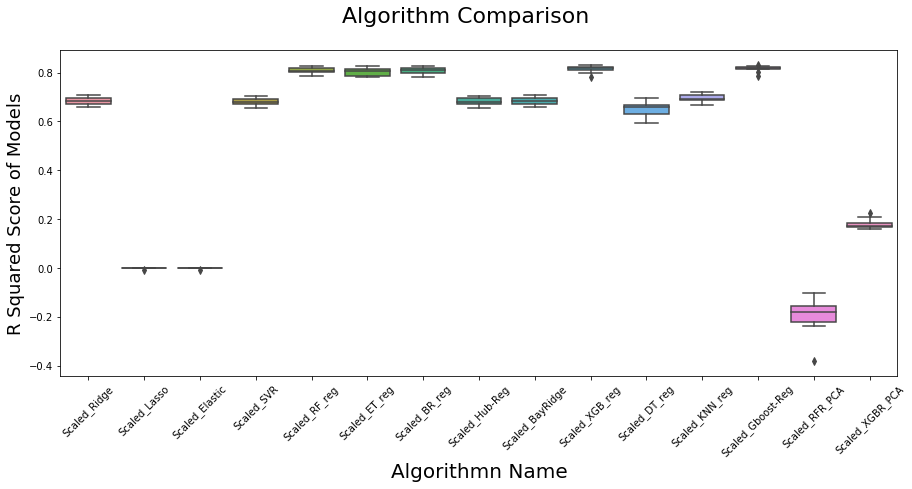

In [81]:
pipelines = []
seed = 2

pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", MinMaxScaler()), 
                     ("Ridge", Ridge(random_state=seed, tol=10 ))
                      ]))
                )
pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", MinMaxScaler()), 
                     ("Lasso", Lasso(random_state=seed, tol=1))
                      ]))
                )
pipelines.append(
                ("Scaled_Elastic", 
                 Pipeline([
                     ("Scaler", MinMaxScaler()), 
                     ("Lasso", ElasticNet(random_state=seed))
                      ]))
                )

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
                 ])
                )
                )

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_ET_reg",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("Scaled_BR_reg",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
                 ]))) 

pipelines.append(
                ("Scaled_Hub-Reg",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("Hub-Reg", HuberRegressor())
                 ]))) 
pipelines.append(
                ("Scaled_BayRidge",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("BR", BayesianRidge())
                 ]))) 

pipelines.append(
                ("Scaled_XGB_reg",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ]))) 

pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("KNN_reg", KNeighborsRegressor())
                 ])))

pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))

pipelines.append(
                ("Scaled_RFR_PCA",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("PCA", PCA(n_components=1)),
                     ("XGB", RandomForestRegressor())
                 ])))

pipelines.append(
                ("Scaled_XGBR_PCA",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("PCA", PCA(n_components=1)),
                     ("XGB", XGBRegressor())
                 ])))


scoring = 'r2'
n_folds = 10

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# 상자그림을 이용해 알고리즘끼리의 성능 차이를 시각적으로 보여 쥽니다.
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn Name", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

# 가장 괜찮게 나온 모델들을 그리드 서치를 통해 성능을 올려봅니다.

In [82]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
random_state=[int(x) for x in np.linspace(start = 10, stop = 1024, num = 1)]
nthread=[int(x) for x in np.linspace(start = 10, stop = 1024, num = 1)]
booster='gbtree','gblinear','dart'
param_grid = dict(n_estimators=n_estimators,random_state=random_state,booster=booster,nthread=nthread)

In [83]:
xgb= XGBRegressor()
xgb_grid_search = GridSearchCV(xgb, param_grid, n_jobs=-1)
xgb_grid_result = xgb_grid_search.fit(X_train, y_train)

In [84]:
print(r2_score(y_test, xgb_grid_result.best_estimator_.predict(X_test)))

0.8334294871188348


In [85]:
xgb_grid_result.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=10, objective='reg:linear', random_state=10,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [86]:
xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=10, objective='reg:linear', random_state=10,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
xgb_scores = -cross_val_score(xgb, X_train, y_train, cv=10, scoring="neg_mean_squared_error")
print('Scores =', xgb_scores)
print('CV mse: %.3f +/- %.3f' % (np.mean(xgb_scores), np.std(xgb_scores)))

Scores = [0.03546716 0.03589177 0.03024257 0.03658235 0.03861968 0.03063219
 0.03429243 0.03158631 0.03396262 0.03077937]
CV mse: 0.034 +/- 0.003


In [87]:
model=xgb.fit(X_train, y_train)

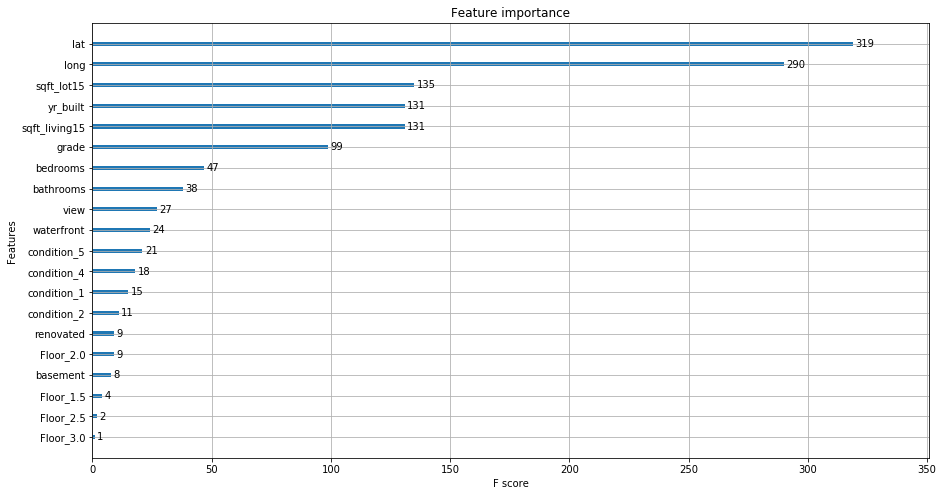

In [88]:
plt.rcParams['figure.figsize'] = [15, 8]
plot_importance(model)

In [89]:
X_scale = MinMaxScaler().fit(X_train)
X_train_scaled = X_scale.transform(X_train)
X_test_scaled = X_scale.transform(X_test)

In [90]:
n_estimators = [100,150, 200]
max_depth = [2, 4, 6]
loss  = ['ls', 'lad', 'huber', 'quantile']
random_state=[3]
gbr_grid = dict(n_estimators=n_estimators, max_depth=max_depth, loss=loss, random_state=random_state)

In [91]:
gbr=GradientBoostingRegressor()
gbr_grid_search = GridSearchCV(gbr, gbr_grid, n_jobs=-1)
gbr_grid_result = gbr_grid_search.fit(X_train_scaled, y_train)

In [79]:
print(r2_score(y_test, gbr_grid_search.best_estimator_.predict(X_test_scaled)))

0.8409887061928948


In [80]:
gbr_grid_result.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=6,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             n_iter_no_change=None, presort='auto', random_state=3,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [81]:
gbr = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=6,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             n_iter_no_change=None, presort='auto', random_state=3,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
gbr_scores = -cross_val_score(gbr, X_train_scaled, y_train, cv=10, scoring="neg_mean_squared_error")
print('Scores =', gbr_scores)
print('CV mse: %.3f +/- %.3f' % (np.mean(gbr_scores), np.std(gbr_scores)))

Scores = [0.03254027 0.03366201 0.0297611  0.03325301 0.03430632 0.02772847
 0.03131513 0.02943478 0.03064908 0.02964508]
CV mse: 0.031 +/- 0.002


# 위도 47.5밑에 있는 집들 모델링

In [92]:
X2=down.drop('price',axis=1)
y2=down[['price']]
X2['Intercept']=1

In [93]:
X2=pd.DataFrame(X2,columns=['Intercept','bedrooms', 'bathrooms', 'waterfront', 'view', 'grade',
       'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated',
       'basement', 'Floor_1.5', 'Floor_2.0', 'Floor_2.5',
       'Floor_3.0', 'Floor_3.5', 'condition_1', 'condition_2', 'condition_4', 'condition_5'])

In [94]:
# Fit X to y
result = sm.OLS(y2, X2).fit()

In [95]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     810.9
Date:                Wed, 09 Jan 2019   Prob (F-statistic):               0.00
Time:                        08:33:22   Log-Likelihood:                 1449.9
No. Observations:                6396   AIC:                            -2858.
Df Residuals:                    6375   BIC:                            -2716.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -18.7216      3.093     -6.053

In [96]:
vif2 = pd.DataFrame()
vif2["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif2["features"] = X2.columns

In [97]:
vif2.round(1)

,VIF Factor,features
0,1639337.6,Intercept
1,1.4,bedrooms
2,2.1,bathrooms
3,1.4,waterfront
4,1.5,view
5,2.3,grade
6,2.9,yr_built
7,1.1,lat
8,1.2,long
9,2.3,sqft_living15


In [98]:
#Floor_3.5 변수를 제거해 줍니다.

In [99]:
X2=pd.DataFrame(X2,columns=['Intercept','bedrooms', 'bathrooms', 'waterfront', 'view', 'grade',
       'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated',
       'basement', 'Floor_1.5', 'Floor_2.0', 'Floor_2.5',
       'Floor_3.0', 'condition_1', 'condition_2', 'condition_4', 'condition_5'])

In [100]:
# Fit X to y
result = sm.OLS(y2, X2).fit()

In [101]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     810.9
Date:                Wed, 09 Jan 2019   Prob (F-statistic):               0.00
Time:                        08:33:28   Log-Likelihood:                 1449.9
No. Observations:                6396   AIC:                            -2858.
Df Residuals:                    6375   BIC:                            -2716.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -18.7216      3.093     -6.053

In [102]:
pca = PCA(n_components=3)
pca.fit(X2)

print('singular value :', pca.singular_values_)
print('singular vector :\n', pca.components_.T)
print('explained variance ratio :', pca.explained_variance_ratio_)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('선택할 차원 수 :', d)

singular value : [2.71374322e+06 4.34340527e+04 1.57284837e+03]
singular vector :
 [[-0.00000000e+00 -3.80585110e-19  7.64163325e-21]
 [-7.83968809e-07  5.28474497e-04 -3.60842912e-03]
 [ 7.88191648e-07  5.59658683e-04 -1.05376490e-02]
 [ 1.38190014e-07  4.74809959e-06  6.01178039e-04]
 [ 3.32341002e-06  1.66552075e-04  6.06475253e-03]
 [ 3.88630713e-06  1.21315171e-03 -1.11436900e-02]
 [-1.19035582e-05  2.10681838e-02 -9.99533393e-01]
 [-1.56257988e-07 -3.54703437e-06  7.15215900e-04]
 [ 6.61185884e-07  3.21521877e-05 -1.82242805e-03]
 [ 2.42723347e-03  9.99773942e-01  2.10891846e-02]
 [ 9.99997054e-01 -2.42644609e-03 -6.30698250e-05]
 [ 2.10824447e-07 -1.81933585e-05  1.95197940e-03]
 [ 1.94457645e-07  2.62630450e-05  4.94683678e-03]
 [ 6.40072957e-07 -4.54586085e-05  2.89035669e-03]
 [-5.88479150e-07  4.29462195e-04 -1.11523976e-02]
 [ 1.21102811e-07  1.14185871e-06 -5.58208370e-05]
 [-1.30969921e-09  5.04889076e-07 -9.66731808e-06]
 [-4.63893967e-09 -1.16741547e-06  6.01842262e-05]

In [103]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.30, random_state=3)

Scaled_Ridge: 0.714207 (+/- 0.040216)
Scaled_Lasso: -0.005709 (+/- 0.005821)
Scaled_Elastic: -0.005709 (+/- 0.005821)
Scaled_SVR: 0.714270 (+/- 0.038718)
Scaled_RF_reg: 0.715813 (+/- 0.037566)
Scaled_ET_reg: 0.715769 (+/- 0.034364)
Scaled_BR_reg: 0.717404 (+/- 0.038686)
Scaled_Hub-Reg: 0.713269 (+/- 0.038280)
Scaled_BayRidge: 0.714053 (+/- 0.040404)
Scaled_XGB_reg: 0.765809 (+/- 0.028587)
Scaled_DT_reg: 0.461582 (+/- 0.072765)
Scaled_KNN_reg: 0.601085 (+/- 0.043786)
Scaled_Gboost-Reg: 0.765511 (+/- 0.028744)
Scaled_RFR_PCA: -0.016768 (+/- 0.058073)
Scaled_XGBR_PCA: 0.298264 (+/- 0.028811)


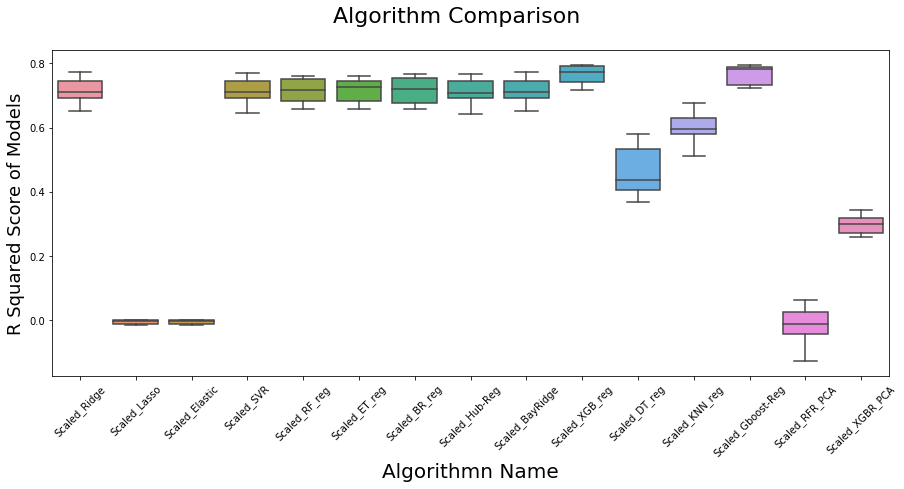

In [104]:
pipelines = []
seed = 2

pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", MinMaxScaler()), 
                     ("Ridge", Ridge(random_state=seed, tol=10 ))
                      ]))
                )
pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", MinMaxScaler()), 
                     ("Lasso", Lasso(random_state=seed, tol=1))
                      ]))
                )
pipelines.append(
                ("Scaled_Elastic", 
                 Pipeline([
                     ("Scaler", MinMaxScaler()), 
                     ("Lasso", ElasticNet(random_state=seed))
                      ]))
                )

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
                 ])
                )
                )

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_ET_reg",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("Scaled_BR_reg",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
                 ]))) 

pipelines.append(
                ("Scaled_Hub-Reg",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("Hub-Reg", HuberRegressor())
                 ]))) 
pipelines.append(
                ("Scaled_BayRidge",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("BR", BayesianRidge())
                 ]))) 

pipelines.append(
                ("Scaled_XGB_reg",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ]))) 

pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("KNN_reg", KNeighborsRegressor())
                 ])))

pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))

pipelines.append(
                ("Scaled_RFR_PCA",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("PCA", PCA(n_components=1)),
                     ("XGB", RandomForestRegressor())
                 ])))

pipelines.append(
                ("Scaled_XGBR_PCA",
                 Pipeline([
                     ("Scaler", MinMaxScaler()),
                     ("PCA", PCA(n_components=1)),
                     ("XGB", XGBRegressor())
                 ])))


scoring = 'r2'
n_folds = 10

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X2_train, y2_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# 상자그림을 이용해 알고리즘끼리의 성능 차이를 시각적으로 보여 쥽니다.
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn Name", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [105]:
xgb2= XGBRegressor()
xgb2_grid_search = GridSearchCV(xgb2, param_grid, n_jobs=-1)
xgb2_grid_result = xgb2_grid_search.fit(X2_train, y2_train)

In [106]:
print(r2_score(y2_test, xgb2_grid_result.best_estimator_.predict(X2_test)))

0.7518085425665797


In [107]:
xgb2_grid_result.best_estimator_

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=178,
       n_jobs=1, nthread=10, objective='reg:linear', random_state=10,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [108]:
xgb2 = XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=178,
       n_jobs=1, nthread=10, objective='reg:linear', random_state=10,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
xgb2_scores = -cross_val_score(xgb2, X2_train, y2_train, cv=10, scoring="neg_mean_squared_error")
print('Scores =', xgb2_scores)
print('CV mse: %.3f +/- %.3f' % (np.mean(xgb2_scores), np.std(xgb2_scores)))

Scores = [0.03195959 0.03097825 0.0295953  0.03493956 0.02598659 0.03752384
 0.02768812 0.02584372 0.02801632 0.02826011]
CV mse: 0.030 +/- 0.004


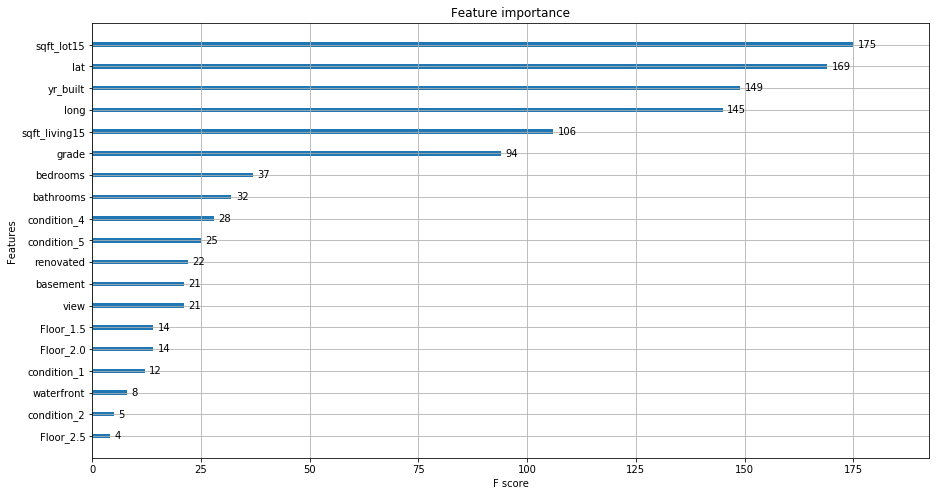

In [109]:
model2=xgb2.fit(X2_train, y2_train)
plt.rcParams['figure.figsize'] = [15, 8]
plot_importance(model2)

In [110]:
X2_scale = MinMaxScaler().fit(X2_train)
X2_train_scaled = X2_scale.transform(X2_train)
X2_test_scaled = X2_scale.transform(X2_test)

In [111]:
gbr2=GradientBoostingRegressor()
gbr2_grid_search = GridSearchCV(gbr2, gbr_grid, n_jobs=-1)
gbr2_grid_result = gbr2_grid_search.fit(X2_train_scaled, y2_train)

In [112]:
print(r2_score(y2_test, gbr2_grid_result.best_estimator_.predict(X2_test_scaled)))

0.7404158508788007


In [113]:
gbr2_grid_result.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=3, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [114]:
gbr2 = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=3, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
gbr2_scores = -cross_val_score(gbr2, X2_train_scaled, y2_train, cv=10, scoring="neg_mean_squared_error")
print('Scores =', gbr2_scores)
print('CV mse: %.3f +/- %.3f' % (np.mean(gbr2_scores), np.std(gbr2_scores)))

Scores = [0.03241168 0.03069025 0.02953358 0.03616803 0.02853528 0.03699041
 0.02891928 0.02632314 0.02790548 0.02767547]
CV mse: 0.031 +/- 0.003


# 결론
King County 지역이 위도 47.5를 경계로 가격 차이가 있다는 의미 있는 결과를 도출했습니다.  
King County 집의 위치에 따른 집 값 예측에  참고 할 수 있습니다.   
# 한계점 
집의 가격은 단순히 그 집의 위치나 평수, 방의 개수뿐만 아니라 주변 환경의 영향도 받기 때문에 이런 데이터가 포함되어 있었다면 더 정확한 모델을 만들 수 있었을 거라 생각 합니다. 3~4년전 데이터라 최근의 경향엔 반영할 수 없습니다.